<a href="https://colab.research.google.com/github/Ashutosh-Gairola/NLP/blob/main/LAB_6(16_10_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Write a program to perform Sentiment Analysis of hotel reviews using SentiWordNet.

In [9]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [16]:
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [token for token in tokens if token.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words # Added return statement to return the processed words


def calculate_sentiment_score(words):
    positive_score = 0
    negative_score = 0
    for word in words:
        synsets = list(swn.senti_synsets(word))
        if synsets:
            pos_score = synsets[0].pos_score()
            neg_score = synsets[0].neg_score()
            # Accumulate scores for each word to get the overall sentiment
            positive_score += pos_score
            negative_score += neg_score
    return positive_score, negative_score  # Return the accumulated scores


def analyze_sentiment(text):
    words = preprocess(text)
    pos_score, neg_score = calculate_sentiment_score(words)

    if pos_score > neg_score:
        return 'positive'
    elif pos_score < neg_score:
        return 'negative'
    else:
        return 'neutral'

if __name__ == '__main__':
    hotel_reviews =[
        "The hotel service was excellent, but the room was not clean.",
        "Amazing experiece Friendly staff and beautiful rooms",
        "Disappointing stay. terrible service and dirty rooms",
        "I would not recommend this hotel to anyone. Bad services."
    ]

    for i,review in enumerate(hotel_reviews,start=1):
        sentiment = analyze_sentiment(review)
        print(f"Review:  {i}")
        print(f"Text: {review}")
        print(f"Sentiment: {sentiment}")
        print("/n")

Review:  1
Text: The hotel service was excellent, but the room was not clean.
Sentiment: positive
/n
Review:  2
Text: Amazing experiece Friendly staff and beautiful rooms
Sentiment: positive
/n
Review:  3
Text: Disappointing stay. terrible service and dirty rooms
Sentiment: negative
/n
Review:  4
Text: I would not recommend this hotel to anyone. Bad services.
Sentiment: negative
/n


## Using Bert

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                              review sentiment_label
0          The hotel was fantastic! I loved my stay.   Very Positive
1  It was a terrible experience. The room was dirty.   Very Negative
2       Okay place, but could use some improvements.         Neutral
3          Absolutely wonderful! Staff was friendly.   Very Positive
4           Not worth the price. Very disappointing.   Very Negative


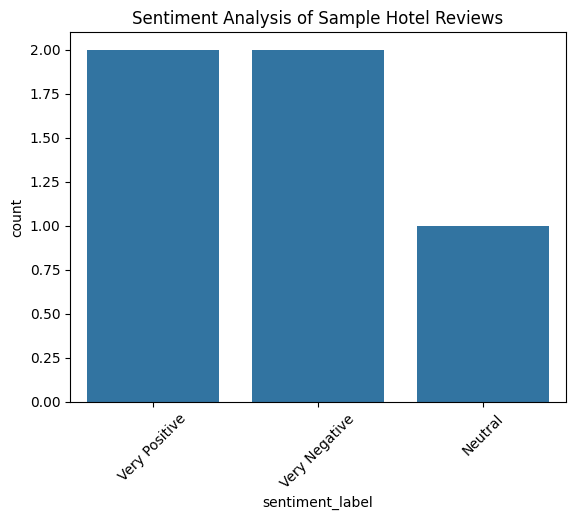

In [19]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a sample dataset
data = {
    'review': [
        "The hotel was fantastic! I loved my stay.",
        "It was a terrible experience. The room was dirty.",
        "Okay place, but could use some improvements.",
        "Absolutely wonderful! Staff was friendly.",
        "Not worth the price. Very disappointing."
    ]
}
reviews_df = pd.DataFrame(data)

# Step 2: Load the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Step 3: Preprocess the text
inputs = tokenizer(reviews_df['review'].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=512)

# Step 4: Perform sentiment analysis
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = softmax(logits, dim=1)
    predicted_labels = torch.argmax(probabilities, dim=1)

# Step 5: Map predictions to sentiment labels
sentiment_labels = {0: 'Very Negative', 1: 'Negative', 2: 'Neutral', 3: 'Positive', 4: 'Very Positive'}
reviews_df['sentiment_label'] = predicted_labels.cpu().numpy().tolist()  # Convert tensor to list
reviews_df['sentiment_label'] = reviews_df['sentiment_label'].map(sentiment_labels) # apply map

# Analyze and visualize results
print(reviews_df[['review', 'sentiment_label']])

# Visualization
sns.countplot(x='sentiment_label', data=reviews_df)
plt.title('Sentiment Analysis of Sample Hotel Reviews')
plt.xticks(rotation=45)
plt.show()


## Write a program to compute the similarity between any two sentences of text using different metrics for analyzing textual similarity.

In [21]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
nlp = spacy.load("en_core_web_sm")
#

In [23]:
def get_cosine_similarity(sentence1, sentence2):
    tokken1 = nlp(sentence1)
    tokken2 = nlp(sentence2)
    tokken1_str=" ".join([token.text for token in tokken1])
    tokken2_str=" ".join([token.text for token in tokken2])
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([tokken1_str, tokken2_str])
    similarity_score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1])[0][0]
    return similarity_score

In [24]:
def main():
    sentence1 = input("Enter the first sentence: ")
    sentence2 = input("Enter the second sentence: ")
    similarity_score = get_cosine_similarity(sentence1, sentence2)
    print(f"Cosine Similarity: {similarity_score}")
#

In [27]:
if __name__ == "__main__":
    main()

Enter the first sentence: india is great country
Enter the second sentence: modiji is india's prime minister
Cosine Similarity: 0.2912194185636897
